In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler, normalize

from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings('ignore')

# Crime Data 

# Hierarchical Clustering

In [2]:
df = pd.read_csv('D:\Data Science Assignments\Assignment 7 clustering\crime_data.csv',index_col=0)
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [3]:
sc = StandardScaler()
data = sc.fit_transform(df)

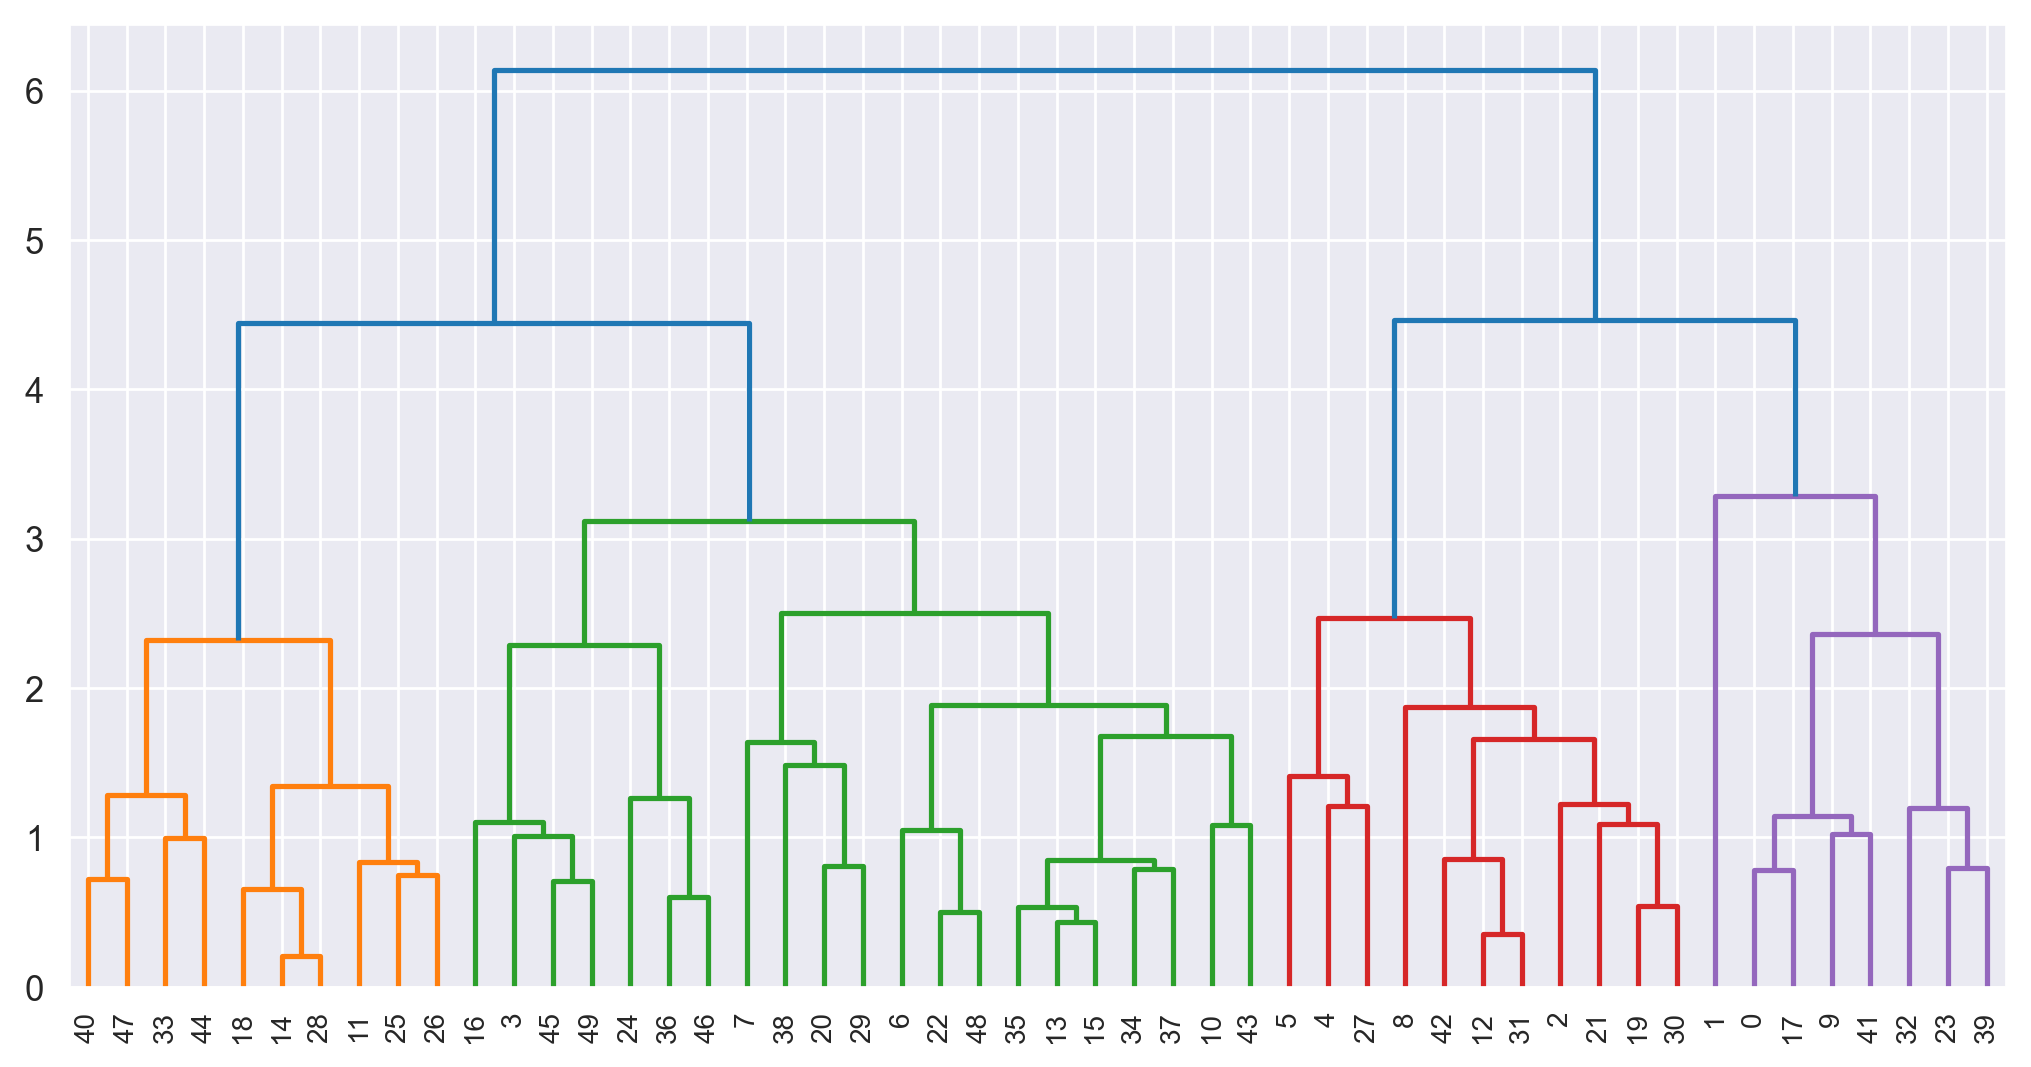

In [4]:
lk = hierarchy.linkage(data,method='complete')  
dendrogram = hierarchy.dendrogram(lk)

In [5]:
hc = AgglomerativeClustering(n_clusters=4)  

y = hc.fit_predict(data) 
y

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [6]:
df['Cluster'] = y
df

,Murder,Assault,UrbanPop,Rape,Cluster
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,3


In [7]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.608333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


In [8]:
silhouette_score(data,y)

0.3370187183556962

<Axes: xlabel='Murder', ylabel='Assault'>

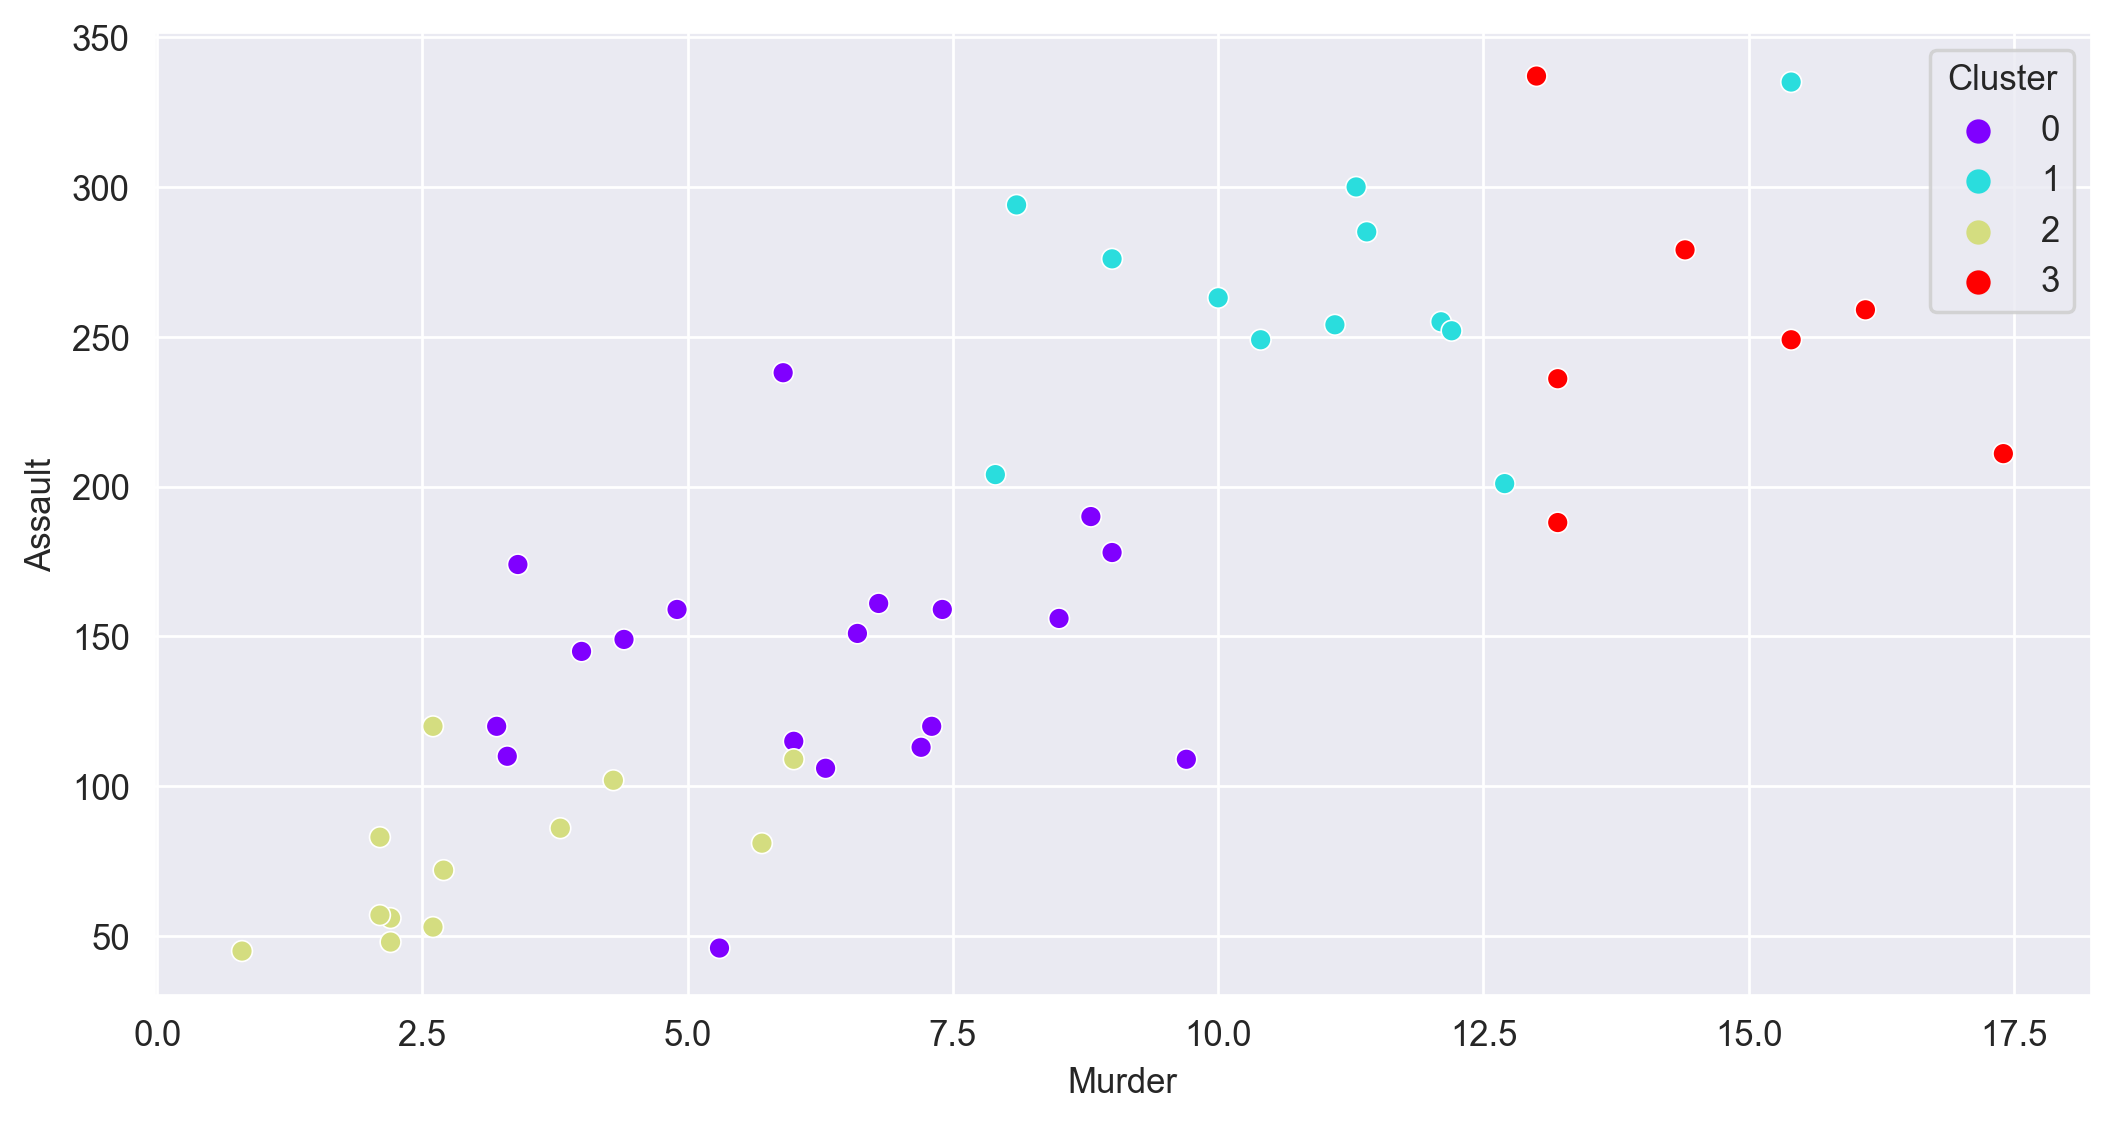

In [9]:
sns.scatterplot(x=df['Murder'],y= df['Assault'], hue = df['Cluster'], palette='rainbow')

<Axes: xlabel='Murder', ylabel='UrbanPop'>

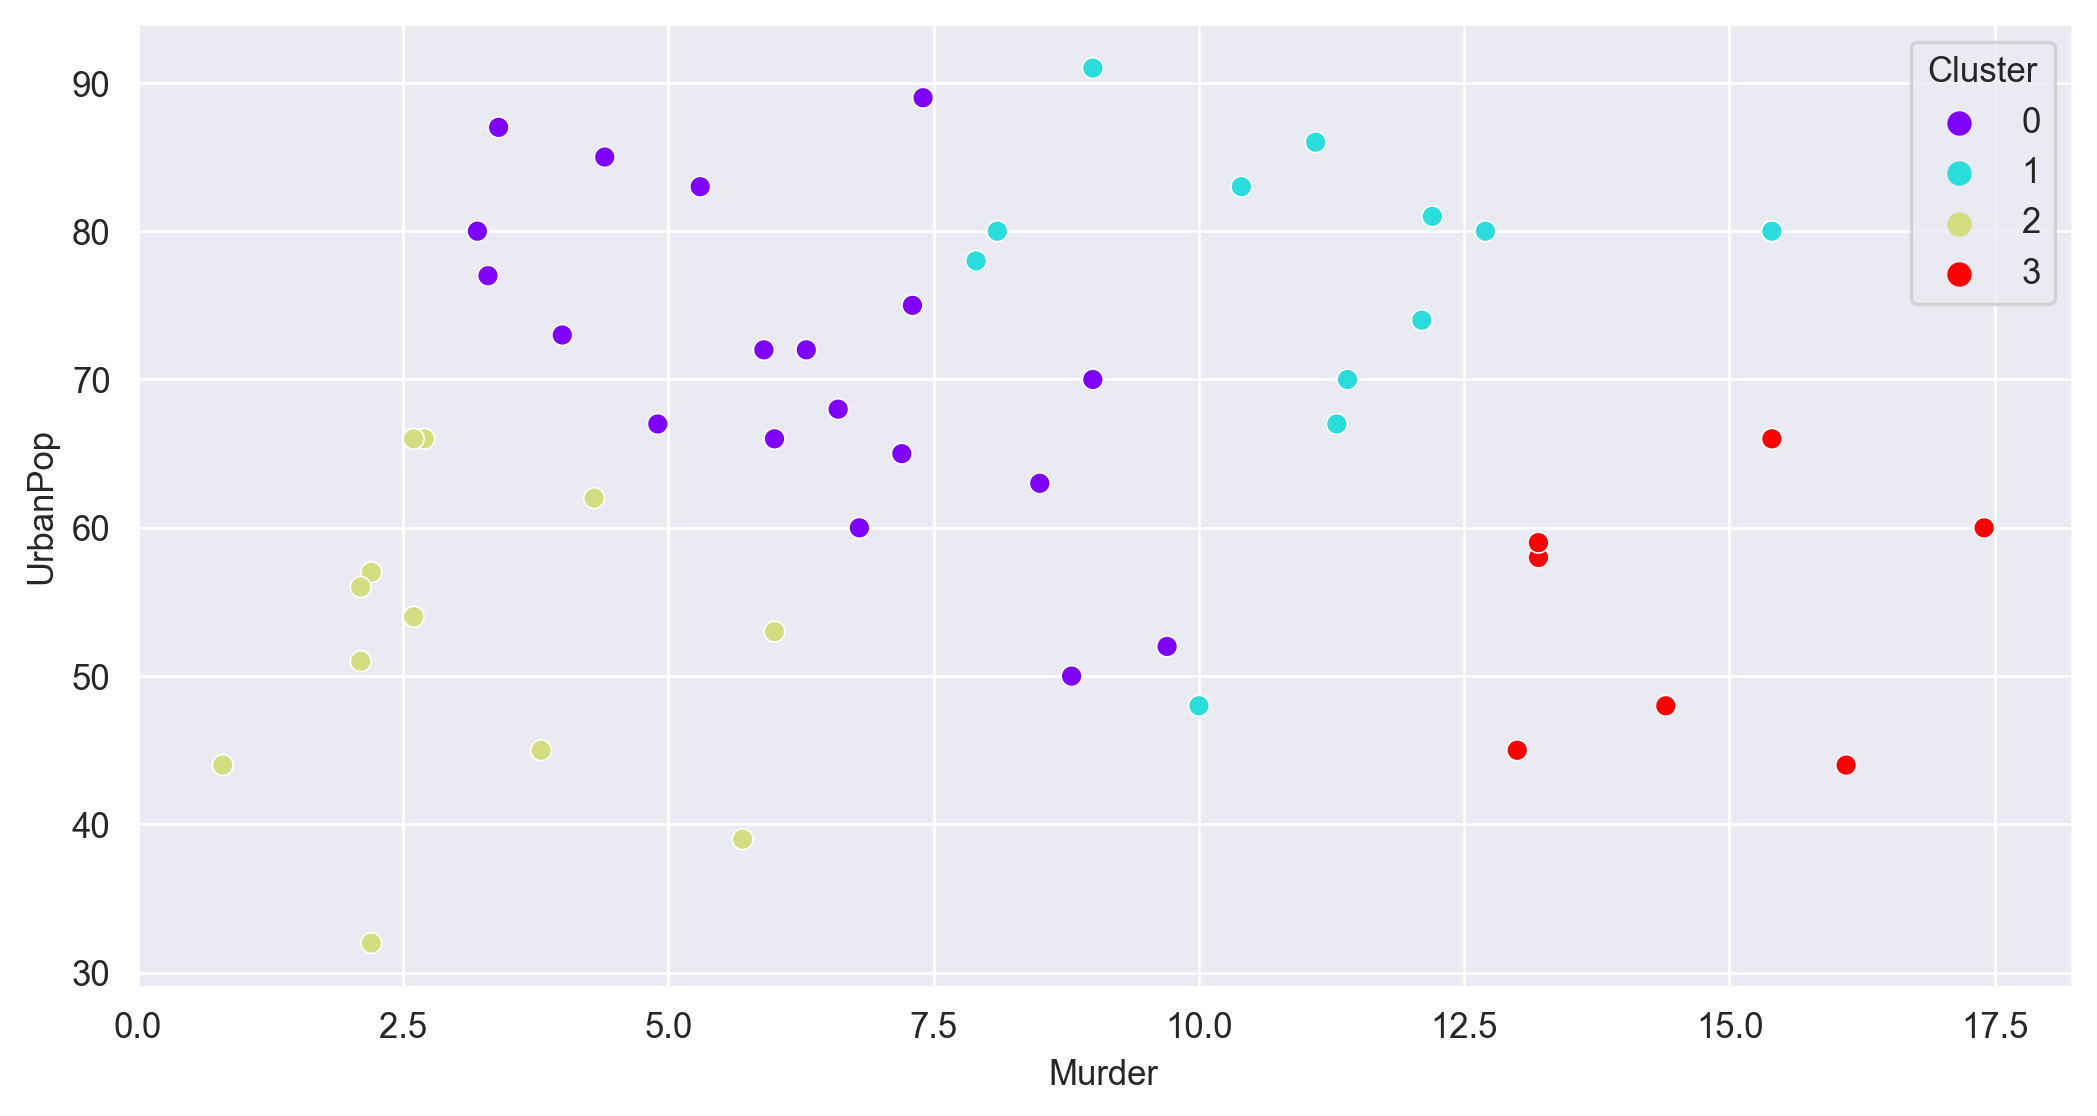

In [10]:
sns.scatterplot(x=df['Murder'],y= df['UrbanPop'], hue = df['Cluster'], palette='rainbow')

<Axes: xlabel='Murder', ylabel='Rape'>

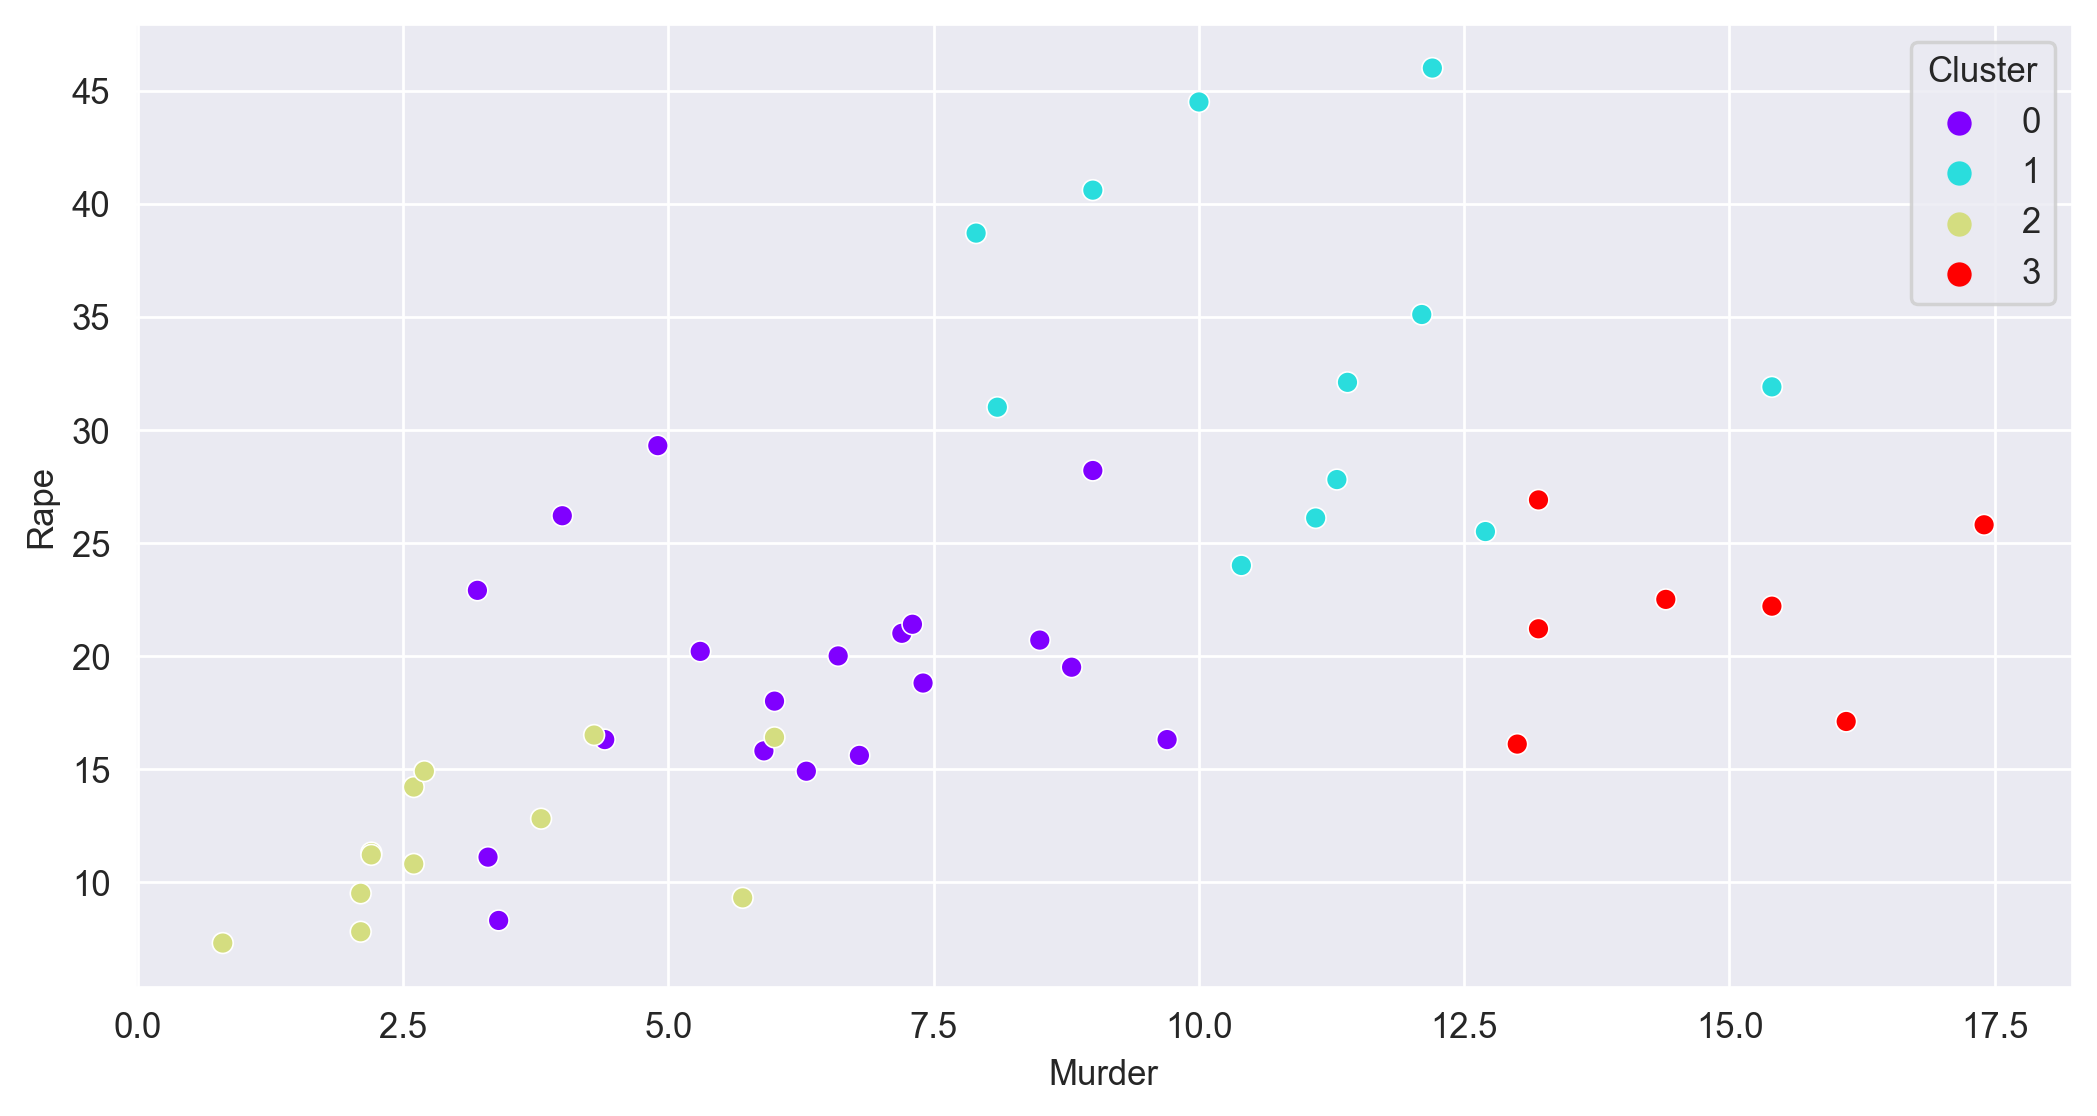

In [11]:
sns.scatterplot(x=df['Murder'],y= df['Rape'], hue = df['Cluster'], palette='rainbow')

# Hyper Parameter tuning

In [12]:
n_clusters_range = range(2, 10)
best_score = -1
best_n_clusters = None

for n_clusters in n_clusters_range:
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
    labels = model.fit_predict(data)
    score = silhouette_score(data, labels)
    
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters

print(f"Best Silhouette Score: {best_score:.4f}")
print(f"Best Number of Clusters: {best_n_clusters}")

Best Silhouette Score: 0.4048
Best Number of Clusters: 2


In [13]:
hc = AgglomerativeClustering(n_clusters=2)  

y = hc.fit_predict(data) 
y

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
silhouette_score(data,y)

0.4047944502519567

# K Means

In [15]:
km = KMeans()  
yp = km.fit_predict(data)  
yp

array([4, 3, 1, 2, 3, 3, 7, 2, 1, 4, 7, 6, 1, 5, 6, 5, 2, 4, 6, 1, 7, 3,
       6, 4, 2, 6, 6, 3, 6, 7, 1, 1, 4, 0, 5, 5, 5, 5, 7, 4, 0, 4, 1, 5,
       0, 2, 5, 0, 6, 2])

In [16]:
km.inertia_ 

36.74077570245181

In [17]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(data)
    wcss.append(km.inertia_)
wcss

[200.00000000000003,
 104.96163315756871,
 80.08569526137276,
 57.66757825000804,
 50.05119672966492,
 44.347436433806834,
 39.695292899358314,
 36.36276373723948,
 33.21651198360333,
 28.969728055133473]

Text(0.5, 1.0, 'Elbow Graph')

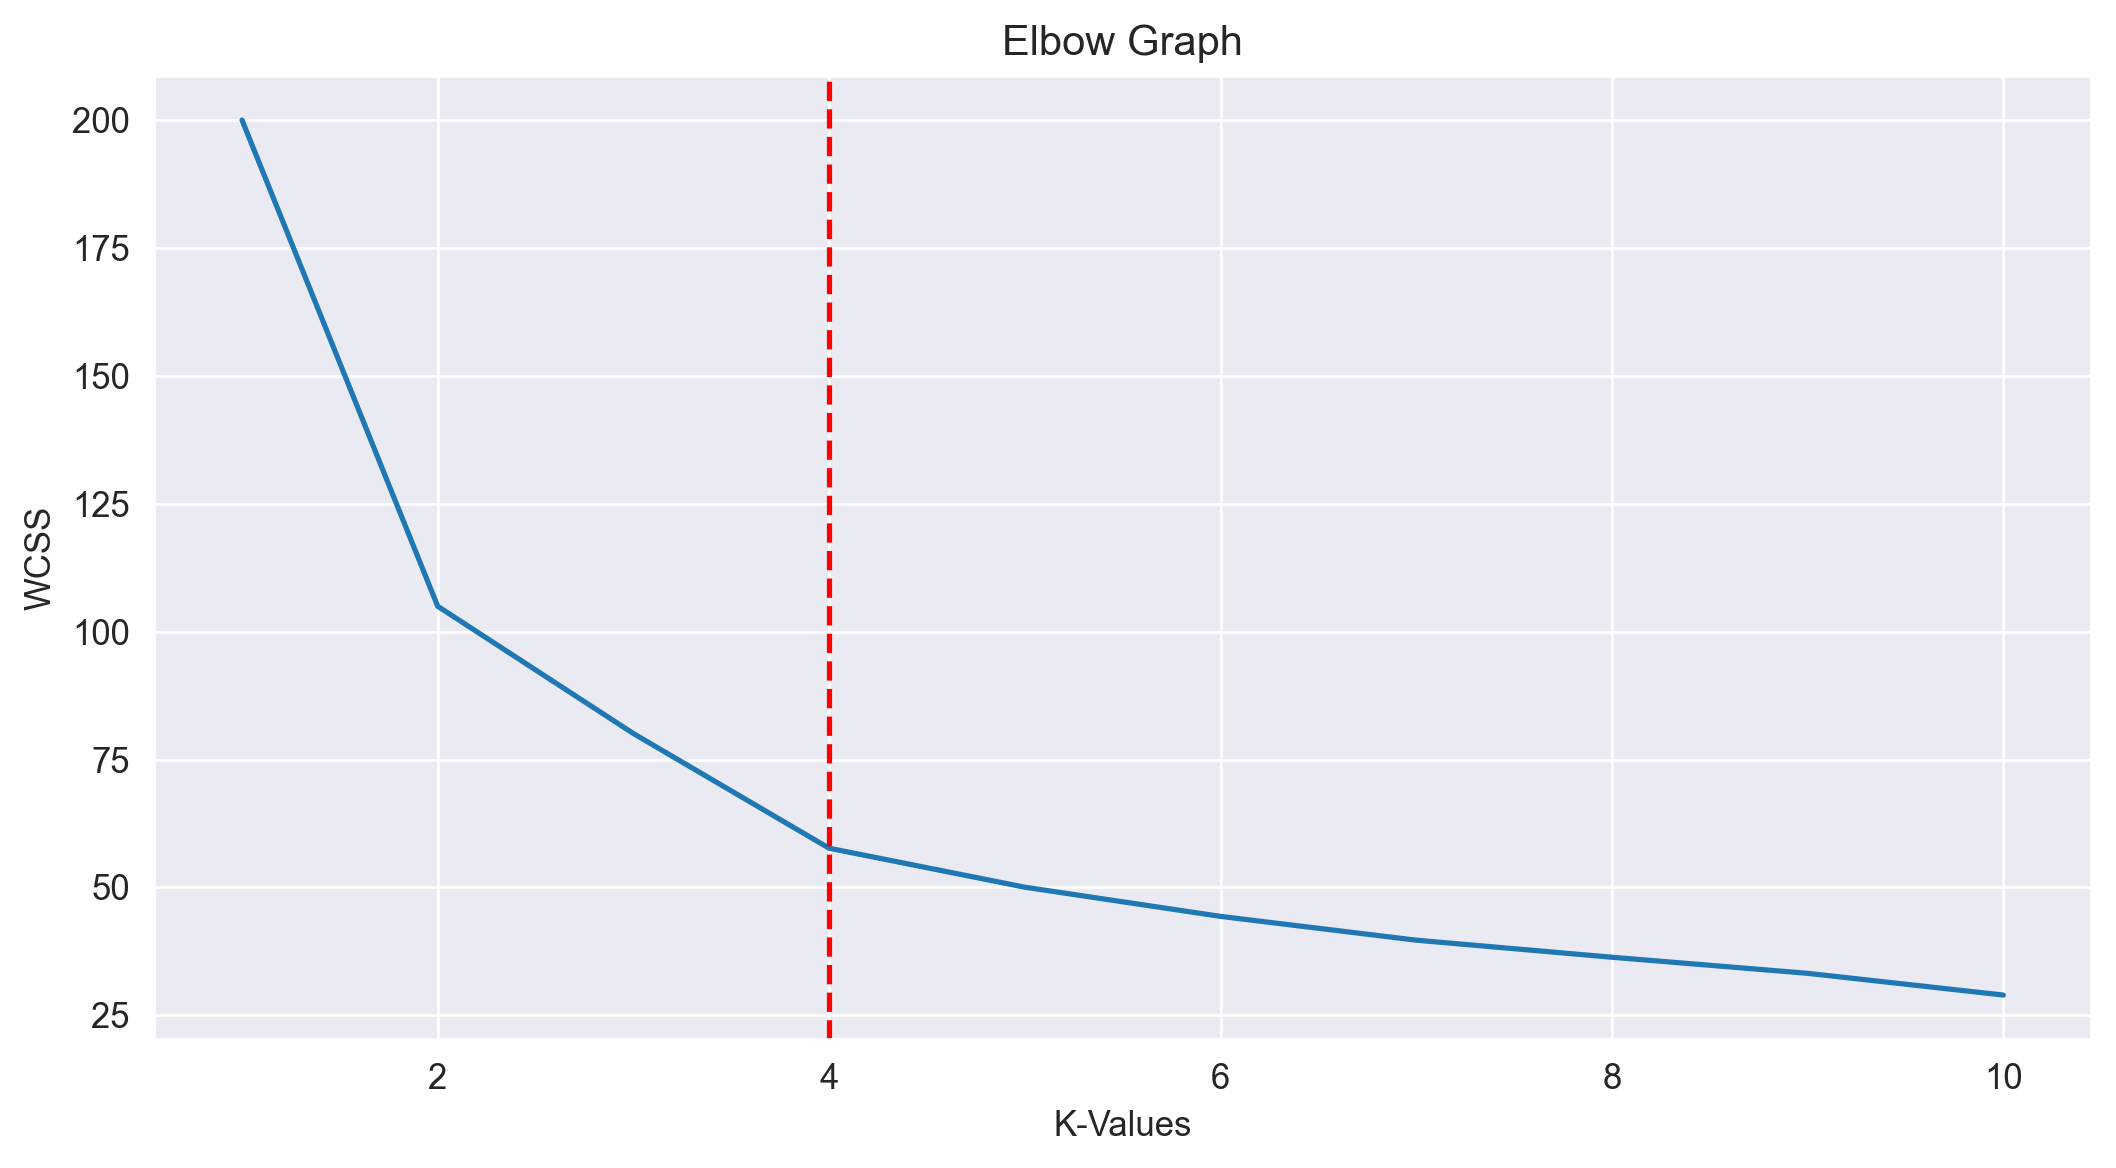

In [18]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 4, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [19]:
km = KMeans(n_clusters=4)  
ypred = km.fit_predict(data)
ypred

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 3, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [20]:
silhouette_score(data,ypred)

0.33968891433344395

# Hyper parameter tuning

In [21]:
n_clusters_range = range(2, 10)
best_score = -1
best_n_clusters = None

for n_clusters in n_clusters_range:
    model = KMeans(n_clusters=n_clusters)
    labels = model.fit_predict(data)
    score = silhouette_score(data, labels)
    
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters

print(f"Best Silhouette Score: {best_score:.4f}")
print(f"Best Number of Clusters: {best_n_clusters}")

Best Silhouette Score: 0.4085
Best Number of Clusters: 2


# DBSCAN

In [22]:
data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [23]:
db = DBSCAN(eps=1, min_samples=3)  #epsilon is 0.5 by default, Min pts are at least 3

y = db.fit_predict(data)
y

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [24]:
silhouette_score(data,y)

0.1929097582325484

In [25]:
neigh = NearestNeighbors(n_neighbors=5).fit(data)
d,index = neigh.kneighbors(data)

In [26]:
distance = np.sort(d[:,1])  
distance

array([0.2079438 , 0.2079438 , 0.35377437, 0.35377437, 0.43312429,
       0.43312429, 0.49909939, 0.49909939, 0.50466926, 0.52515083,
       0.53326883, 0.54082482, 0.54082482, 0.55122406, 0.57035779,
       0.58411812, 0.59956023, 0.59956023, 0.65497312, 0.70111326,
       0.71097658, 0.71809843, 0.71809843, 0.73797792, 0.74649625,
       0.75913104, 0.78006247, 0.78006247, 0.79455301, 0.79455301,
       0.80586349, 0.80586349, 0.83250223, 0.84928467, 0.8610239 ,
       0.86797806, 0.88100359, 0.95367898, 0.98866758, 0.99246041,
       1.0013278 , 1.0482199 , 1.0582674 , 1.08184506, 1.19227586,
       1.20897691, 1.20897691, 1.24886253, 1.30974334, 2.07898369])

Text(0.5, 1.0, 'K-Distance Graph')

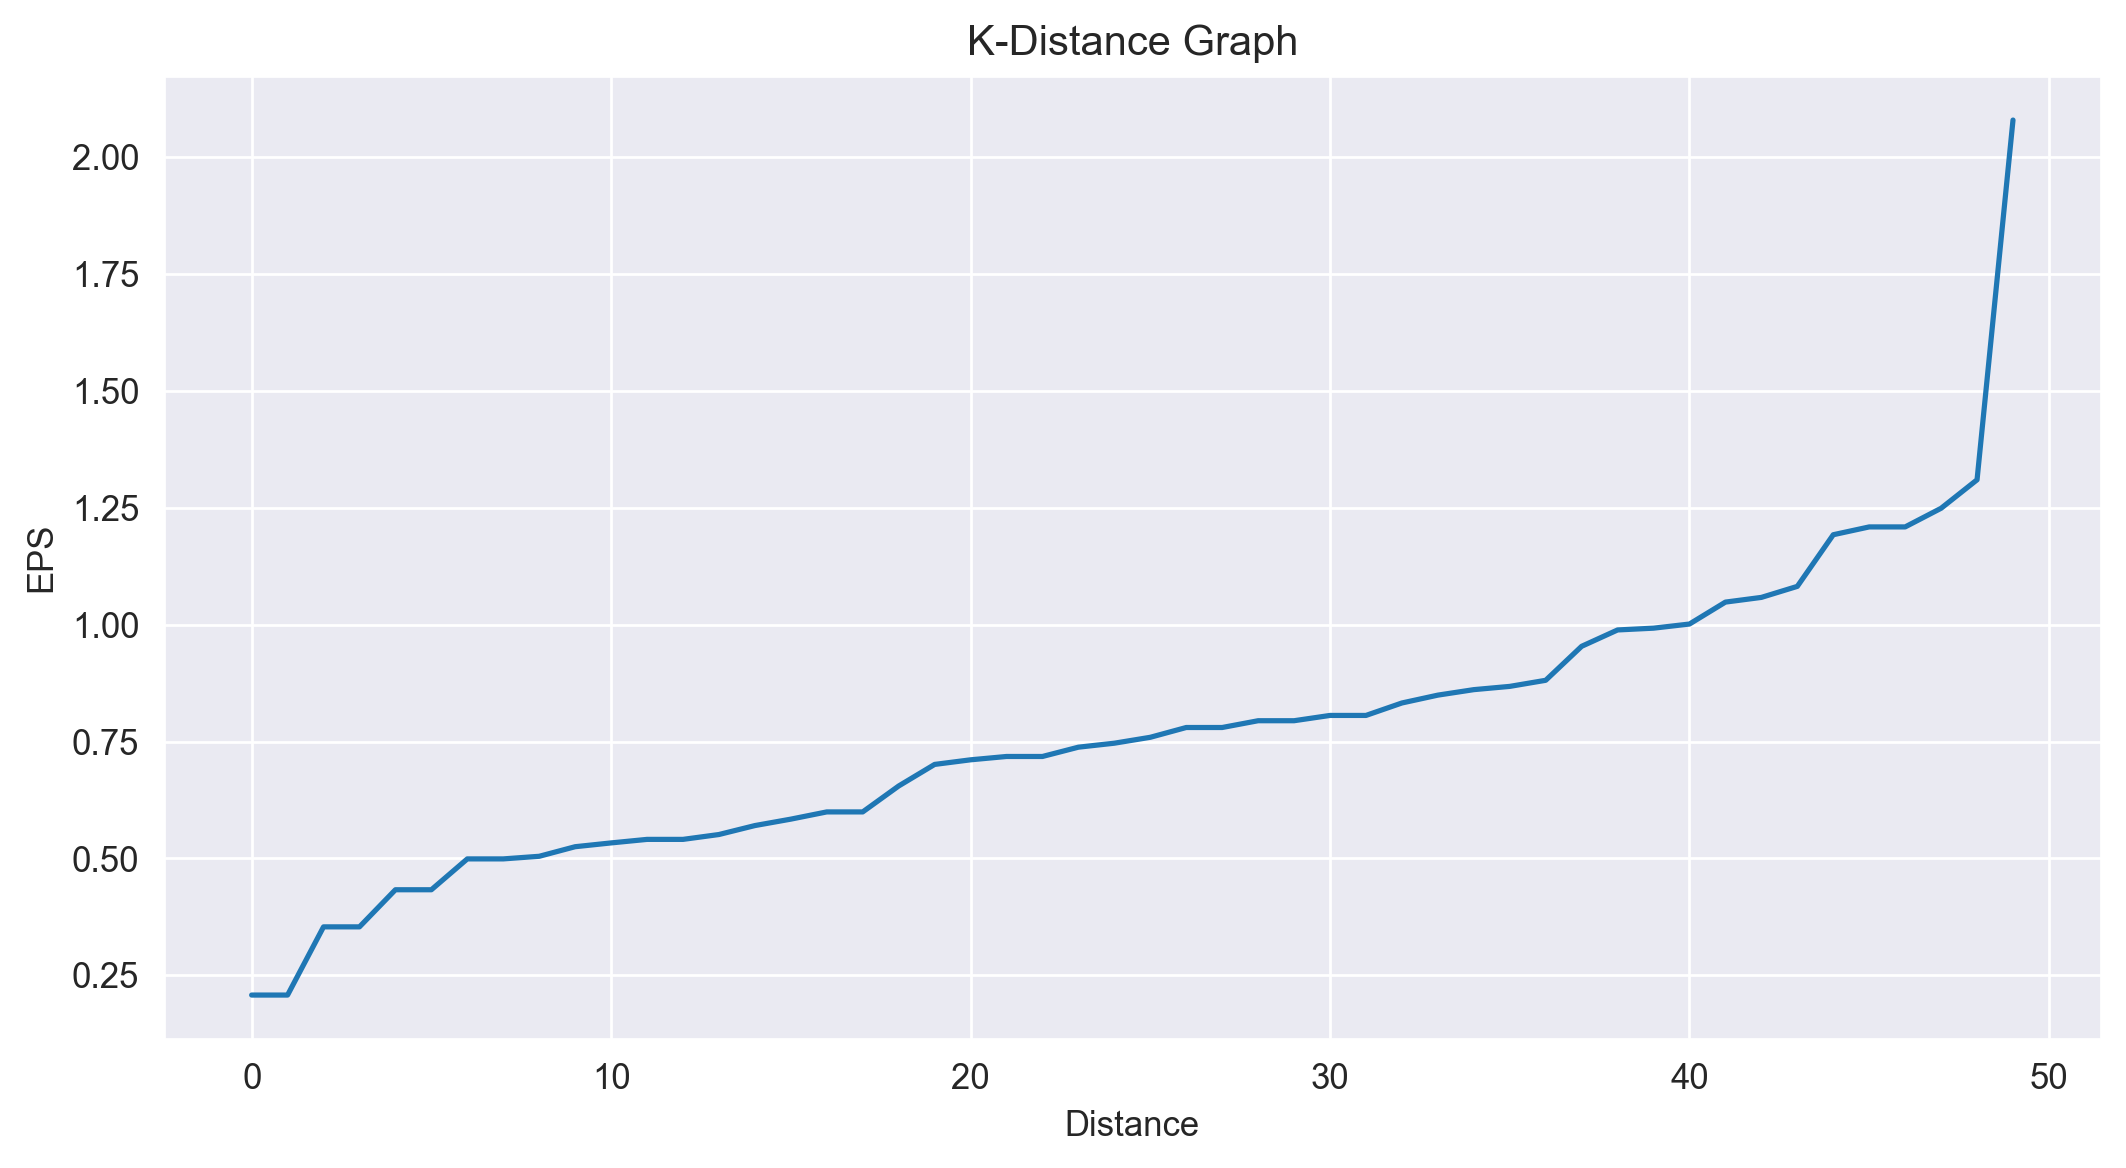

In [27]:
plt.plot(distance)
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

In [28]:
db = DBSCAN(eps=2,min_samples=3)
yp = db.fit_predict(data)
yp

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [29]:
silhouette_score(data,yp)

0.234555987531598

In [30]:
df['Cluster'] = yp
df

,Murder,Assault,UrbanPop,Rape,Cluster
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,-1
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,0


In [31]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
-1,10.000000,263.000000,48.000000,44.500000
0,7.742857,168.877551,65.897959,20.757143


In [32]:
x = data

In [33]:
x = StandardScaler().fit_transform(x)

best_silhouette_score = -1
best_params = {'eps': None, 'min_samples': None}

# Hyperparameter tuning
for eps in [0.1, 0.5, 1.0, 1.5]:
    for min_samples in [3,5,7,9,11,13,15,17,19]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(x)

        # Check if the clustering resulted in more than one cluster
        if len(set(labels)) > 1:
            silhouette_avg = silhouette_score(x, labels)
            print(f"Epsilon={eps}, MinPts={min_samples}, Silhouette Score: {silhouette_avg}")

            # Update best parameters if a better silhouette score is found
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

print(f"Best Parameters: {best_params}")

Epsilon=1.0, MinPts=3, Silhouette Score: 0.19290975823254836
Epsilon=1.0, MinPts=5, Silhouette Score: 0.19486631995858553
Epsilon=1.0, MinPts=7, Silhouette Score: 0.25525974484552283
Epsilon=1.0, MinPts=9, Silhouette Score: 0.06560719942095251
Epsilon=1.0, MinPts=11, Silhouette Score: 0.04276049421347173
Epsilon=1.5, MinPts=3, Silhouette Score: 0.23455598753159795
Epsilon=1.5, MinPts=5, Silhouette Score: 0.23455598753159795
Epsilon=1.5, MinPts=7, Silhouette Score: 0.23455598753159795
Epsilon=1.5, MinPts=9, Silhouette Score: 0.22687726498381672
Epsilon=1.5, MinPts=11, Silhouette Score: 0.2368633404361358
Epsilon=1.5, MinPts=13, Silhouette Score: 0.25129397171915274
Epsilon=1.5, MinPts=15, Silhouette Score: 0.2990942029672711
Epsilon=1.5, MinPts=17, Silhouette Score: 0.31339868166383966
Epsilon=1.5, MinPts=19, Silhouette Score: 0.2878993853215024
Best Parameters: {'eps': 1.5, 'min_samples': 17}


In [34]:
db = DBSCAN(eps=1.5,min_samples=17)
yp = db.fit_predict(data)
yp

array([-1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1, -1,
        0,  0,  0,  0, -1, -1,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0],
      dtype=int64)

In [35]:
silhouette_score(data,yp)

0.31339868166383966